This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [8]:
train_data[0]
#train_data.shape

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels[0]
#train_labels.shape

1

In [12]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [19]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 24ms/step - loss: 0.5146 - accuracy: 0.7836 - val_loss: 0.3847 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3042 - accuracy: 0.9025 - val_loss: 0.3052 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2224 - accuracy: 0.9299 - val_loss: 0.2806 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1763 - accuracy: 0.9455 - val_loss: 0.2785 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1446 - accuracy: 0.9547 - val_loss: 0.2864 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.9655 - val_loss: 0.2999 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1018 - accuracy: 0.9694 - val_loss: 0.3420 - val_accuracy: 0.8707
Epoch 8/20
30

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

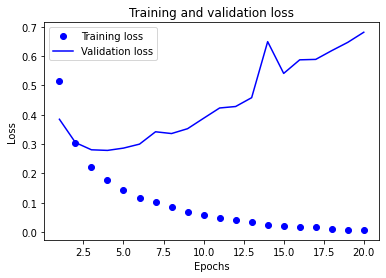

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

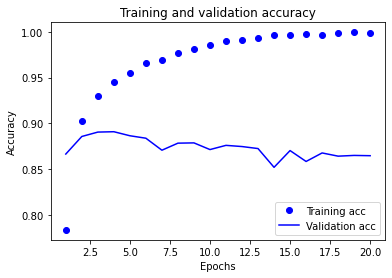

In [24]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4598 - accuracy: 0.8217
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1998 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3140 - accuracy: 0.8750


In [26]:
results

[0.3140076994895935, 0.8750399947166443]

### Using a trained model to generate predictions on new data

In [27]:
model.predict(x_test)

782/782 [==============================] - 1s 824us/step


array([[0.11841822],
       [0.99985933],
       [0.63861656],
       ...,
       [0.07591645],
       [0.0446323 ],
       [0.4970593 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [28]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [29]:
len(train_data)

8982

In [30]:
len(test_data)

2246

In [31]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [32]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [34]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [35]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
x_train[0], x_train.shape

(array([0., 1., 1., ..., 0., 0., 0.]), (8982, 10000))

**Encoding the labels**

In [43]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [44]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [46]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [47]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 2.5799 - accuracy: 0.5144 - val_loss: 1.7013 - val_accuracy: 0.6660
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.3863 - accuracy: 0.7177 - val_loss: 1.2649 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0238 - accuracy: 0.7849 - val_loss: 1.1039 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8076 - accuracy: 0.8269 - val_loss: 0.9981 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6363 - accuracy: 0.8659 - val_loss: 0.9278 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5090 - accuracy: 0.8938 - val_loss: 0.9131 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4067 - accuracy: 0.9139 - val_loss: 0.8765 - val_accuracy: 0.8130
Epoch 8/20
16/16 [=

**Plotting the training and validation loss**

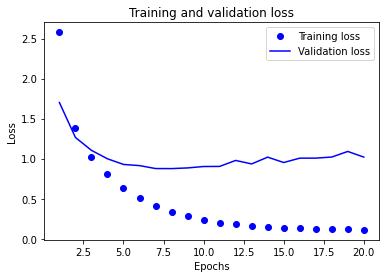

In [49]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

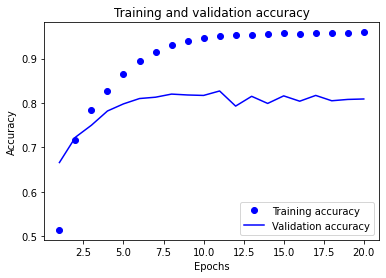

In [50]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [51]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 6ms/step - loss: 2.5575 - accuracy: 0.5195
Epoch 2/9
18/18 [==============================] - 0s 6ms/step - loss: 1.3932 - accuracy: 0.7149
Epoch 3/9
18/18 [==============================] - 0s 6ms/step - loss: 1.0302 - accuracy: 0.7803
Epoch 4/9
18/18 [==============================] - 0s 6ms/step - loss: 0.7968 - accuracy: 0.8304
Epoch 5/9
18/18 [==============================] - 0s 6ms/step - loss: 0.6256 - accuracy: 0.8697
Epoch 6/9
18/18 [==============================] - 0s 6ms/step - loss: 0.4872 - accuracy: 0.8990
Epoch 7/9
18/18 [==============================] - 0s 6ms/step - loss: 0.3898 - accuracy: 0.9212
Epoch 8/9
18/18 [==============================] - 0s 6ms/step - loss: 0.3180 - accuracy: 0.9314
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9448 - accuracy: 0.7970


In [52]:
results

[0.9448157548904419, 0.796972393989563]

In [53]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1918967052537845

### Generating predictions on new data

In [54]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 880us/step


In [55]:
predictions[0].shape

(46,)

In [56]:
np.sum(predictions[0])

1.0

In [57]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [58]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [63]:
y_train, train_labels

(array([ 3,  4,  3, ..., 25,  3, 25]), array([ 3,  4,  3, ..., 25,  3, 25]))

In [64]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [65]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 3.1214 - accuracy: 0.1764 - val_loss: 2.5041 - val_accuracy: 0.4140
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 2.0617 - accuracy: 0.4614 - val_loss: 1.7905 - val_accuracy: 0.5900
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 1.5409 - accuracy: 0.6252 - val_loss: 1.5602 - val_accuracy: 0.6300
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 1.3143 - accuracy: 0.6815 - val_loss: 1.4872 - val_accuracy: 0.6640
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 1.1813 - accuracy: 0.7114 - val_loss: 1.4774 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 1.0915 - accuracy: 0.7226 - val_loss: 1.4219 - val_accuracy: 0.6770
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 1.0206 - accuracy: 0.7320 - val_loss: 1.4426 - val_accuracy: 0.6770
Epoch 8/20
63/63 [==

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [66]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [67]:
train_data.shape

(404, 13)

In [68]:
test_data.shape

(102, 13)

In [69]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [74]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [78]:
train_data[0].mean(axis=0)

0.026154884944011178

In [79]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [80]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [81]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [82]:
all_scores

[1.994256615638733, 2.4152162075042725, 2.327171802520752, 2.3796026706695557]

In [83]:
np.mean(all_scores)

2.2790618240833282

**Saving the validation logs at each fold**

In [84]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [85]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [95]:
len(average_mae_history), average_mae_history[49]

(500, 2.418389171361923)

**Plotting validation scores**

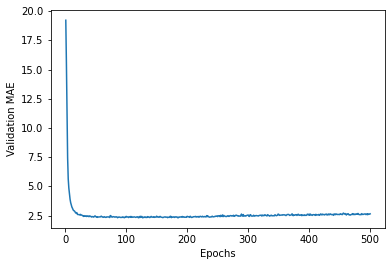

In [86]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

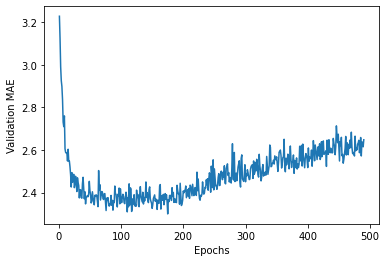

In [96]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [97]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 14.7853 - mae: 2.6384


In [98]:
test_mae_score

2.6384172439575195

### Generating predictions on new data

In [100]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 857us/step


array([8.049221], dtype=float32)

### Wrapping up

## Summary